#PROBLEM STATEMENT
Develop a predictive model that can accurately estimate the sales of each product in different stores based on the provided dataset. The dataset contains information about 1559 products across 10 stores in various cities, along with attributes describing both products and stores. The challenge lies in addressing missing values in the data, potentially caused by technical glitches in reporting from some stores.


#Hypothesis



*   Hypothesis: Certain product attributes such as weight, size, or brand may significantly influence sales.
*   Hypothesis: The missing values in the dataset need to be addressed carefully. Imputing missing values appropriately can enhance the accuracy of the predictive model.
*  Hypothesis: Products with higher visibility on store shelves might experience increased sales. The model should explore the relationship between visibility and sales.
*   Hypothesis:MRP might result in higher sales, assuming customers associate higher prices with better quality.






In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile

# Specify the path to your zip file
zip_file_path = '/content/drive/MyDrive/9961_14084_bundle_archive.zip'

# Specify the destination folder for extraction
extracted_folder_path = '/content/extracted_data'

# Open and extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [3]:
import pandas as pd
df_train=pd.read_csv("/content/extracted_data/Train.csv")
df_test=pd.read_csv("/content/extracted_data/Test.csv")
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

EDA

In [5]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [6]:
# Summary statistics of numerical columns
print(df_train.describe())


       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [7]:
# missing values
print(df_train.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


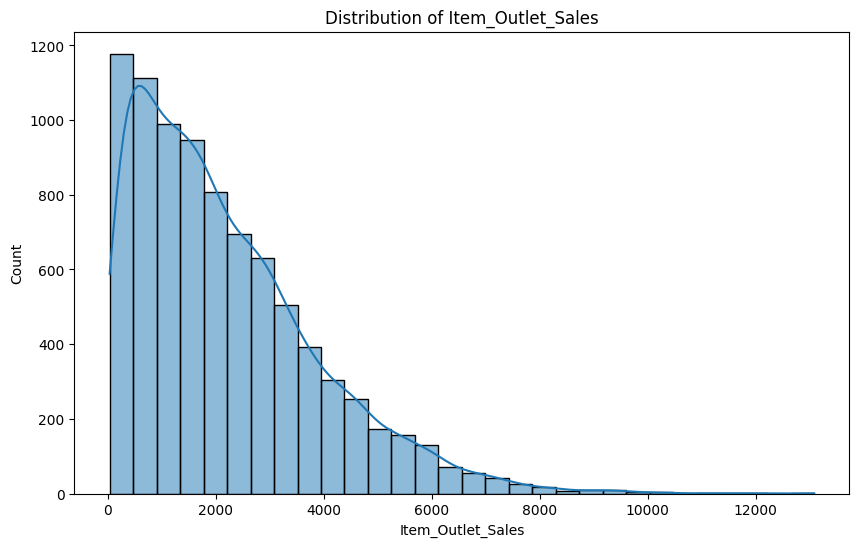

In [8]:
# Explore the distribution of the target variable 'Item_Outlet_Sales'
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.show()

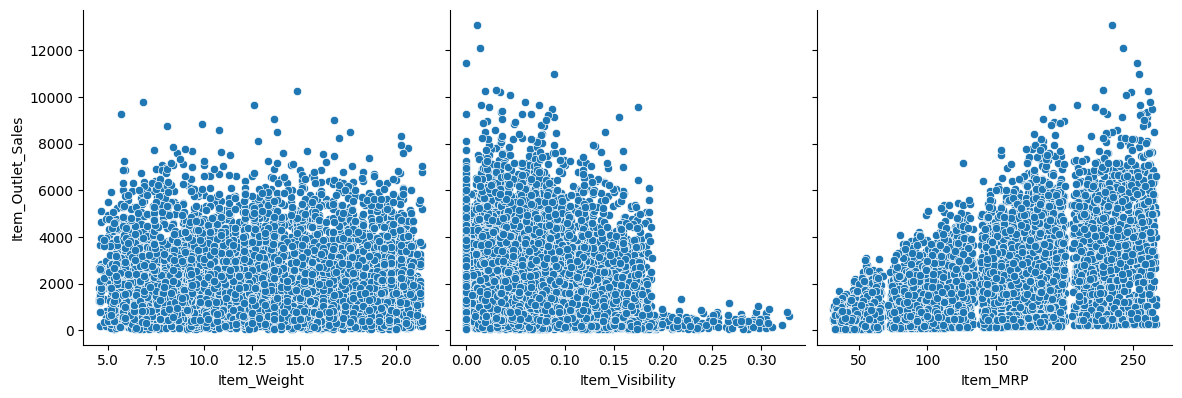

In [9]:

# Explore relationships between numerical features and the target variable using scatter plots
sns.pairplot(df_train, x_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP'], y_vars='Item_Outlet_Sales', height=4)
plt.show()

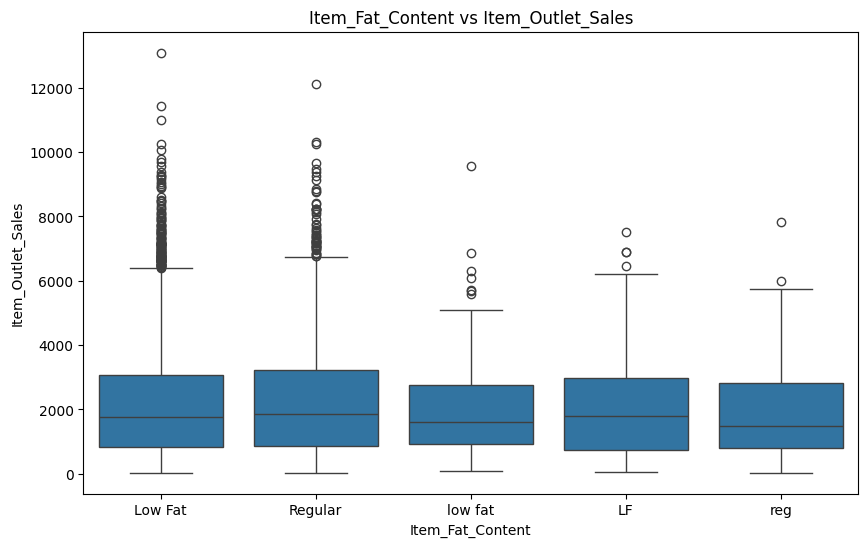

In [10]:
# Example: Boxplot for 'Item_Fat_Content' vs 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df_train)
plt.title('Item_Fat_Content vs Item_Outlet_Sales')
plt.show()

<ipython-input-11-50ce852b0664>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


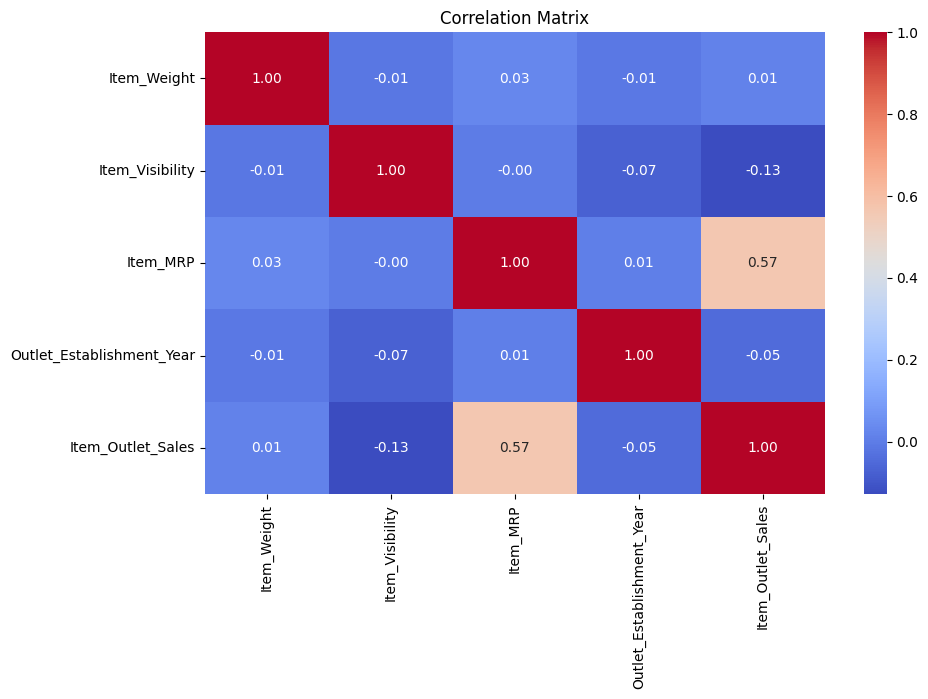

In [11]:
# Correlation matrix to understand relationships between numerical variables
correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Here we can see only mrp have the moderately high positive correlation with outlet sales and item weight oly have 1% ppositive correlation.

item visibility and outlet establishment year shows negative correlation


In [12]:
# Impute missing values for 'Item_Weight' with the mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

# Impute missing values for 'Outlet_Size' with the mode
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

# Check if there are any remaining missing values
print(df_train.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [13]:
# Impute missing values for 'Item_Weight' with the mean
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

# Impute missing values for 'Outlet_Size' with the mode
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

# Check if there are any remaining missing values
print(df_test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [14]:
df_train.duplicated().sum()

0

UNIVARIATE ANALYSIS

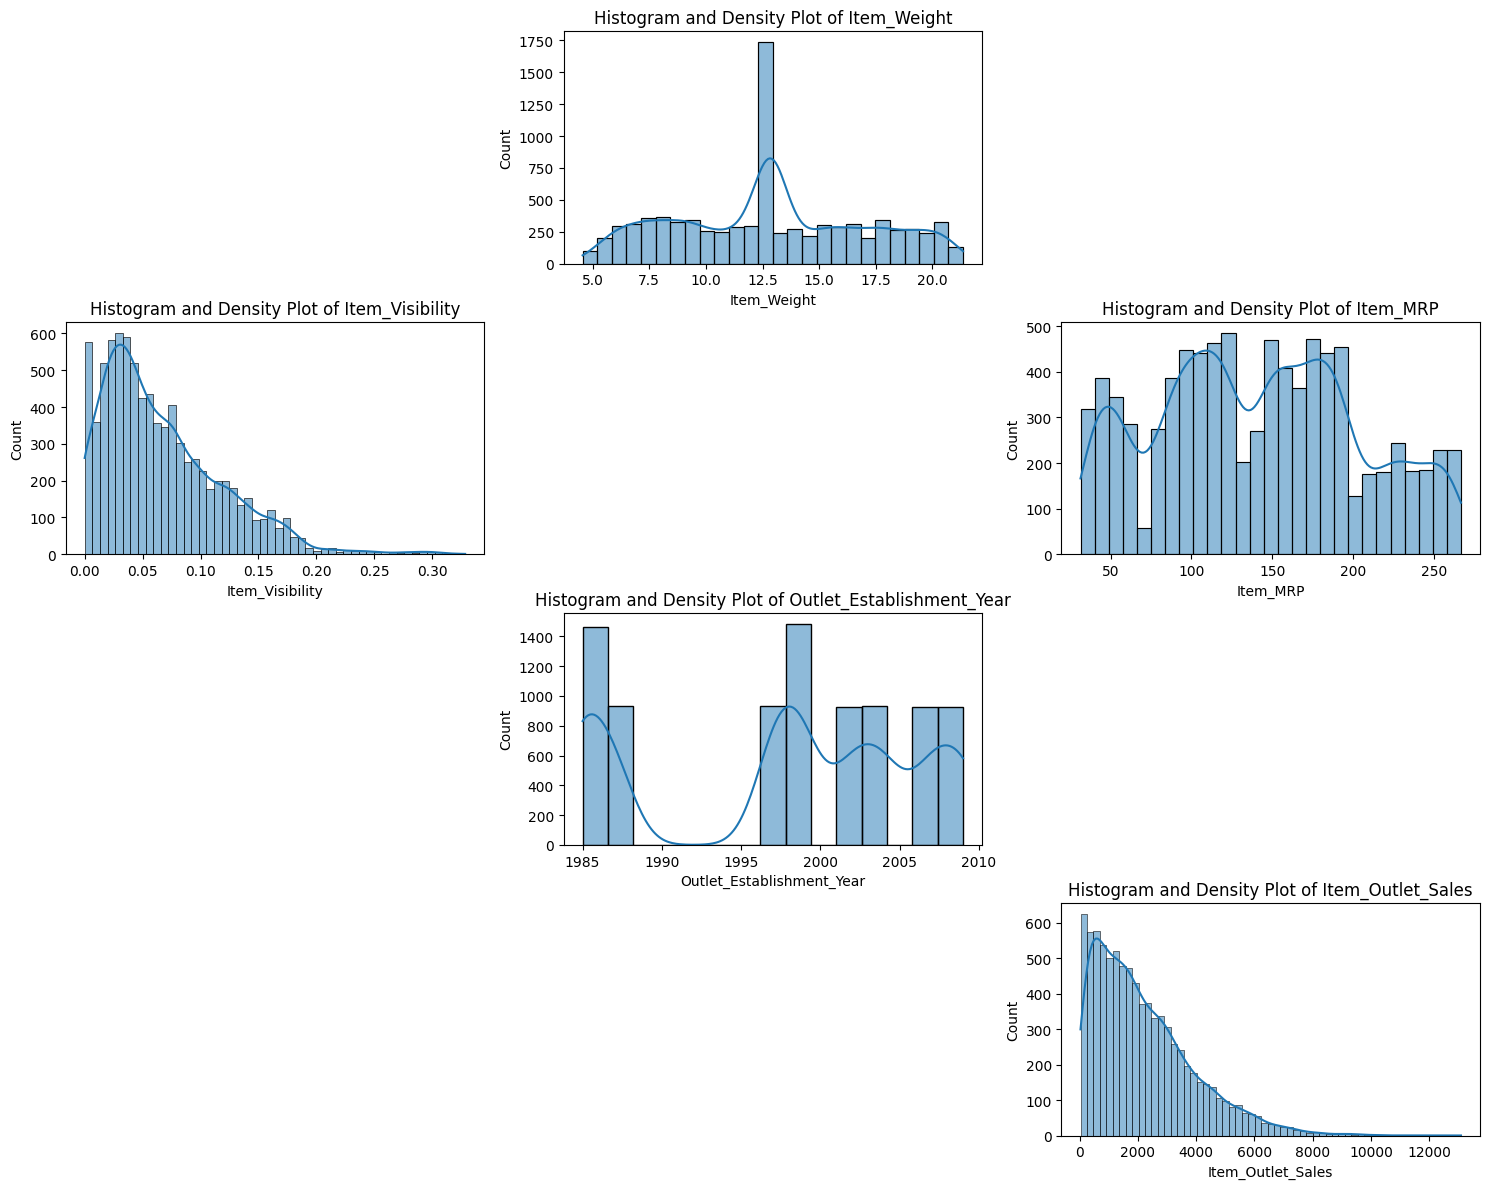

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Loop through each column and create histograms and density plots
for i, col in enumerate(df_train.columns):
    if df_train[col].dtype in ['int64', 'float64']:
        sns.histplot(df_train[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram and Density Plot of {col}')
    else:
        axes[i].axis('off')  # Hide plots for non-numerical columns

# Adjust layout
plt.tight_layout()
plt.show()



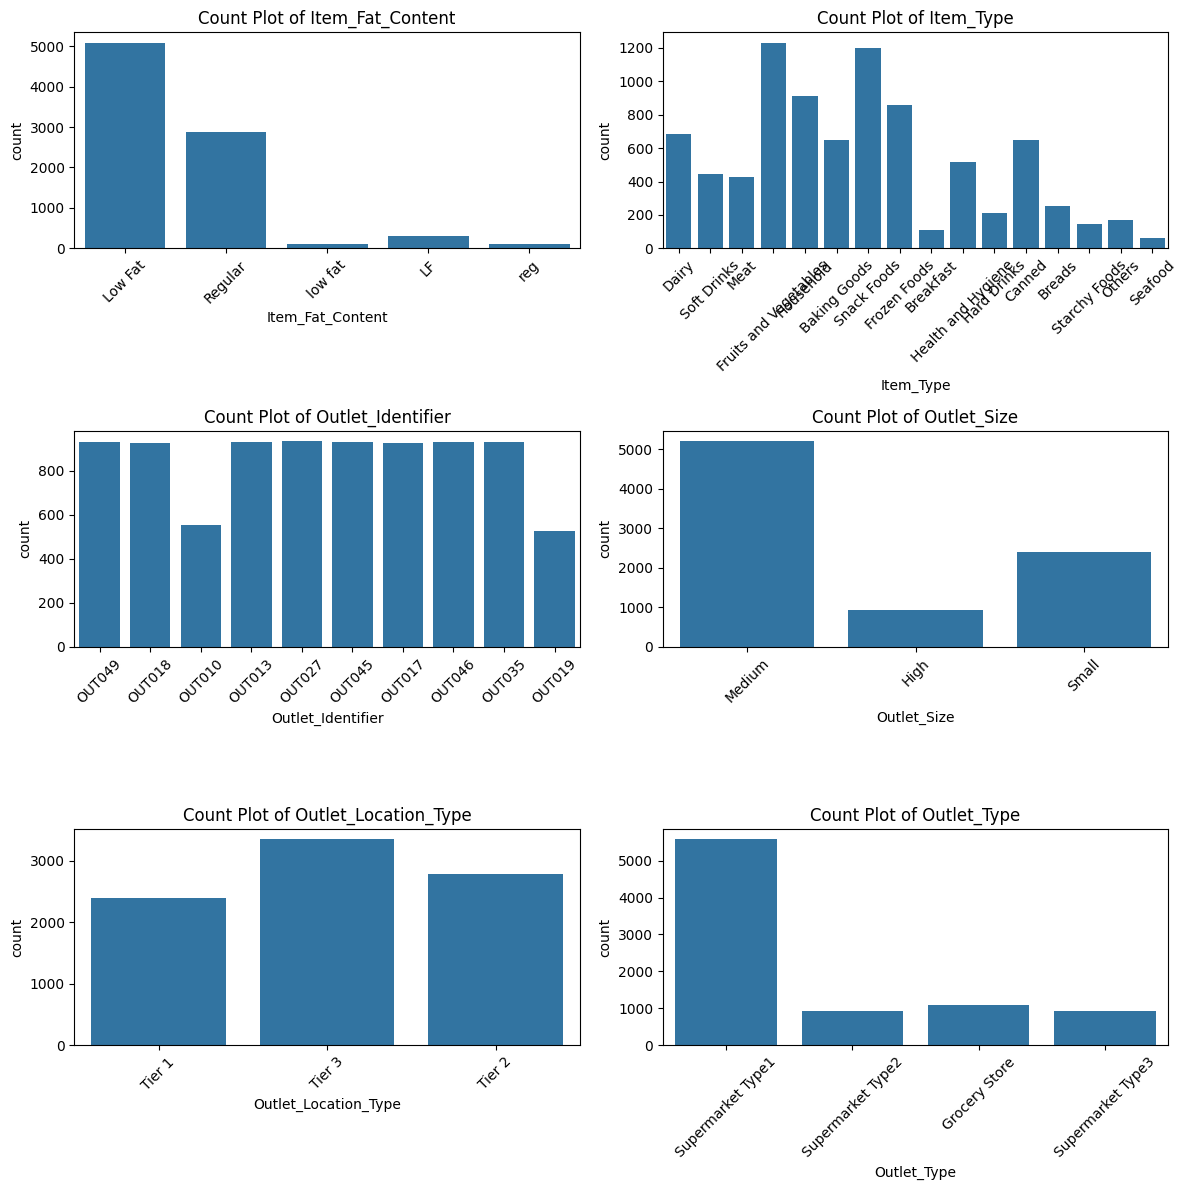

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Loop through each column and create count plots
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df_train, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()
plt.show()


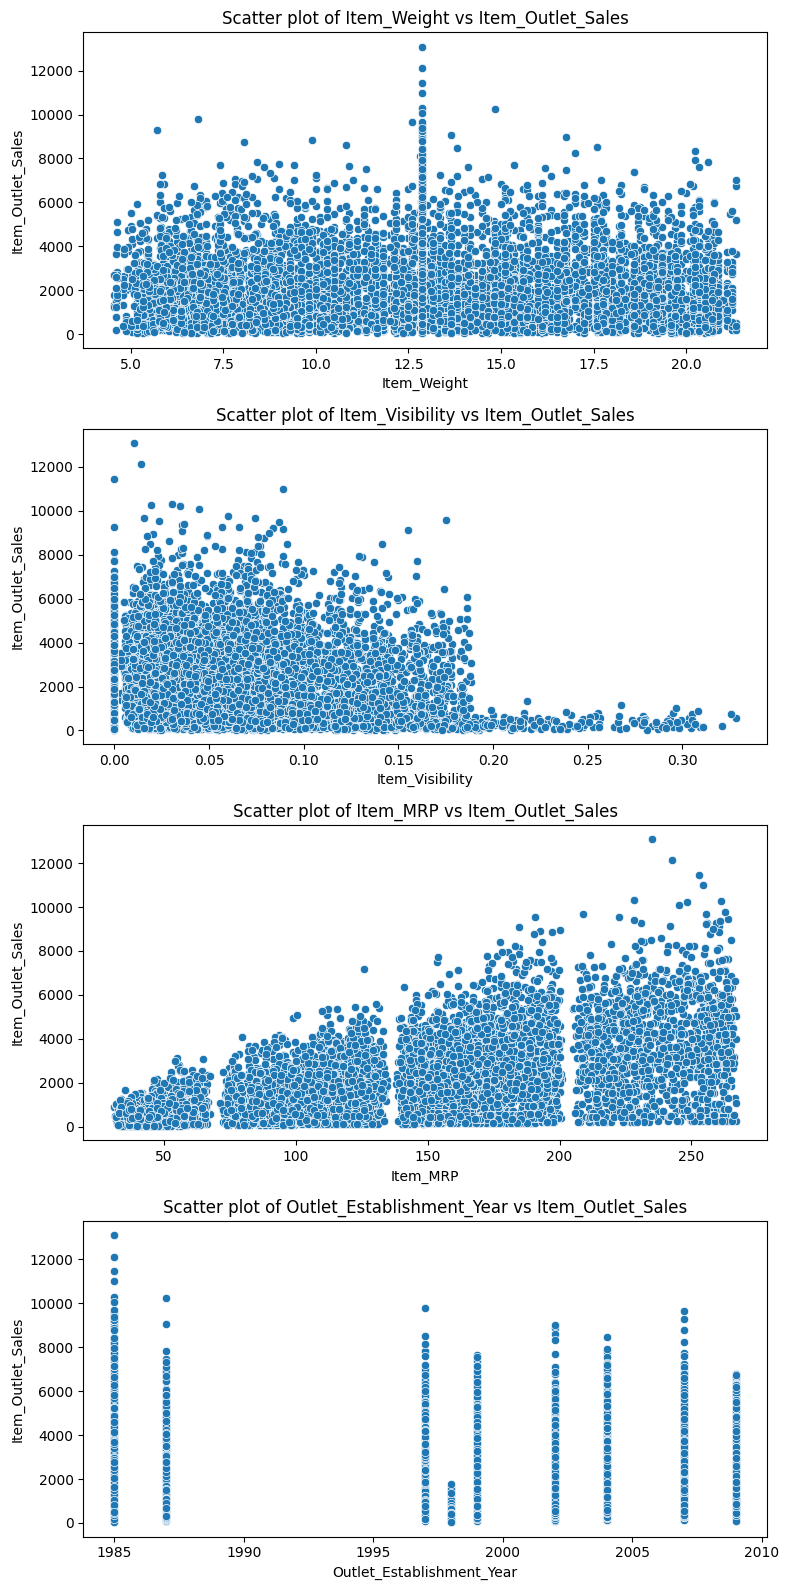

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for scatter plots
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 4 * len(numerical_columns)))

# Loop through numerical columns and create scatter plots
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df_train[col], y=df_train['Item_Outlet_Sales'], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {col} vs Item_Outlet_Sales')

plt.tight_layout()
plt.show()


Feature Engineering

Label Encoding

In [18]:
# List of categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Loop through each categorical column and print unique values
for col in categorical_columns:
    unique_values = df_train[col].unique()
    print(f"Unique values in '{col}': {unique_values}")


Unique values in 'Item_Fat_Content': ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values in 'Item_Type': ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in 'Outlet_Identifier': ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique values in 'Outlet_Size': ['Medium' 'High' 'Small']
Unique values in 'Outlet_Location_Type': ['Tier 1' 'Tier 3' 'Tier 2']
Unique values in 'Outlet_Type': ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Standardising the representation of 'Item Fat Content'

In [19]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})


In [20]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})


In [21]:
print(df_train['Item_Fat_Content'].unique())
print(df_test['Item_Fat_Content'].unique())

['Low Fat' 'Regular']
['Low Fat' 'Regular']


In [22]:
# Create dummy variables using pandas get_dummies for selected columns
df_train = pd.get_dummies(df_train, columns=['Item_Fat_Content', 'Item_Type',
                                 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


In [23]:
# Create dummy variables using pandas get_dummies for selected columns
df_test = pd.get_dummies(df_test, columns=['Item_Fat_Content', 'Item_Type',
                                 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_train['Outlet_Identifier'] = label_encoder.fit_transform(df_train['Outlet_Identifier'])
df_test['Outlet_Identifier'] = label_encoder.fit_transform(df_test['Outlet_Identifier'])

In [25]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,9,1999,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,3,2009,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,9,1999,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,0,1998,732.3800,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,1,1987,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [26]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0.007565,107.8622,9,1999,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,FDW14,8.300000,0.038428,87.3198,2,2007,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,NCN55,14.600000,0.099575,241.7538,0,1998,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,2,2007,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,FDY38,12.695633,0.118599,234.2300,5,1985,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


Linear refression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
X_train = df_train.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)
y_train= df_train['Item_Outlet_Sales']



In [29]:
# Initialize the Linear Regression model
model = LinearRegression()

In [30]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Calculate R-squared on the training set
# Make predictions on the training set
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f'R-squared on training data: {r2_train}')

R-squared on training data: 0.5637650620863442


In [32]:
X_test = df_test.drop('Item_Identifier', axis=1)


In [33]:
y_pred = model.predict(X_test)

In [34]:
# Assuming you want to add the predictions to the original test data
df_test['Predicted_Sales'] = y_pred

# Display the test data with predictions
print(df_test[['Item_Identifier', 'Predicted_Sales']])

     Item_Identifier  Predicted_Sales
0              FDW58      1835.760915
1              FDW14      1531.502963
2              NCN55      1881.660250
3              FDQ58      2581.679050
4              FDY38      5136.653104
...              ...              ...
5676           FDB58      2303.840089
5677           FDD47      2453.995474
5678           NCO17      1824.375301
5679           FDJ26      3587.376883
5680           FDU37      1285.683761

[5681 rows x 2 columns]


#Ridge Regression
(L2 Regularization):


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
ridge_model = Ridge(alpha=1.0)

In [50]:
ridge_model.fit(X_train_normalized, y_train)


Ridge()

In [51]:
# Make predictions on the training set
y_train_pred_ridge = ridge_model.predict(X_train_normalized)

In [52]:
# Evaluate the performance on the training set
import numpy as np
mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_train, y_train_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - Root Mean Squared Error: {rmse_ridge}')
print(f'Ridge Regression - R-squared: {r2_ridge}')

Ridge Regression - Mean Squared Error: 1270495.8280005467
Ridge Regression - Root Mean Squared Error: 1127.1627335928679
Ridge Regression - R-squared: 0.5636732771294033


Lasso

In [40]:
from sklearn.linear_model import Lasso

# Assuming X_train and y_train are your training data
# Initialize the Lasso regression model with a regularization strength (alpha)
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_lasso = lasso_model.predict(X_train)

# Evaluate the performance on the training set
mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_train, y_train_pred_lasso)

print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression - Root Mean Squared Error: {rmse_lasso}')
print(f'Lasso Regression - R-squared: {r2_lasso}')


Lasso Regression - Mean Squared Error: 1273073.79997116
Lasso Regression - Root Mean Squared Error: 1128.3057209689048
Lasso Regression - R-squared: 0.5627879235242992


#Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Initialize the Random Forest regression model with desired parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the parameters


In [43]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_train_pred_rf = rf_model.predict(X_train)

In [45]:
# Evaluate the performance on the training set
mse_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_train, y_train_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')

Random Forest - Mean Squared Error: 180189.92823964037
Random Forest - Root Mean Squared Error: 424.48784227541825
Random Forest - R-squared: 0.9381173246300054


#XG Boost

In [62]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [63]:
# Convert data to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train_normalized, label=y_train)


In [64]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
}

In [65]:
model = xgb.train(params, dtrain, num_boost_round=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:56:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [66]:
dtest = xgb.DMatrix(X_test_normalized)

In [67]:
y_pred = model.predict(dtest)

In [68]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")

Training Set Metrics:
Mean Squared Error (MSE): 1270228.5686310094
Root Mean Squared Error (RMSE): 1127.0441733272967


In [69]:
# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Set R-squared: {r2_train}")

Training Set R-squared: 0.5637650620863442
